In [16]:
!pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [17]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pmdarima as pm

In [18]:
data = sm.datasets.sunspots.load_pandas().data
data

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
...,...,...
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5


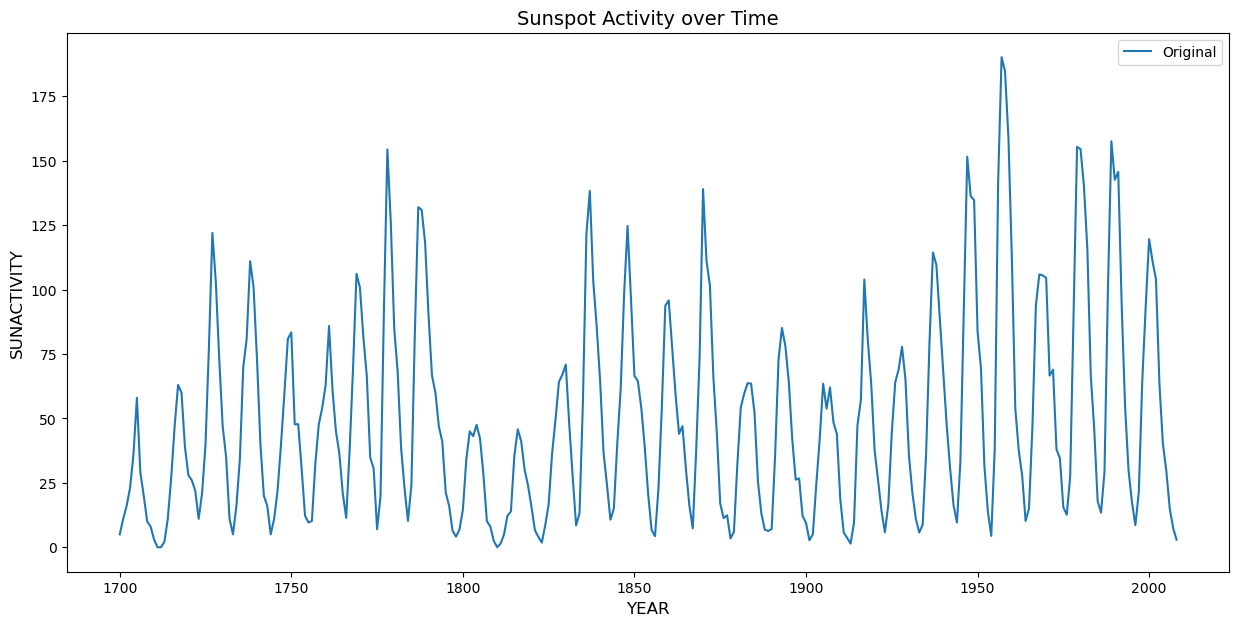

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Original')
plt.xlabel('YEAR', fontsize=12)
plt.ylabel('SUNACTIVITY', fontsize=12)
plt.title('Sunspot Activity over Time', fontsize=14)
plt.legend(loc='best')
#plt.xticks(data['YEAR'][::18]) 
plt.show()

In [20]:
train_data = data[data['YEAR'] <= 2008]

In [21]:
# Навчання моделі ARIMA
model = sm.tsa.ARIMA(train_data['SUNACTIVITY'], order=(2, 1, 2))  # Приклад параметрів (2, 1, 2)
model_fit = model.fit()

C:\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [22]:
future_years = range(2009, 2031)
forecast = model_fit.predict(start=len(train_data), end=len(train_data) + len(future_years) - 1)

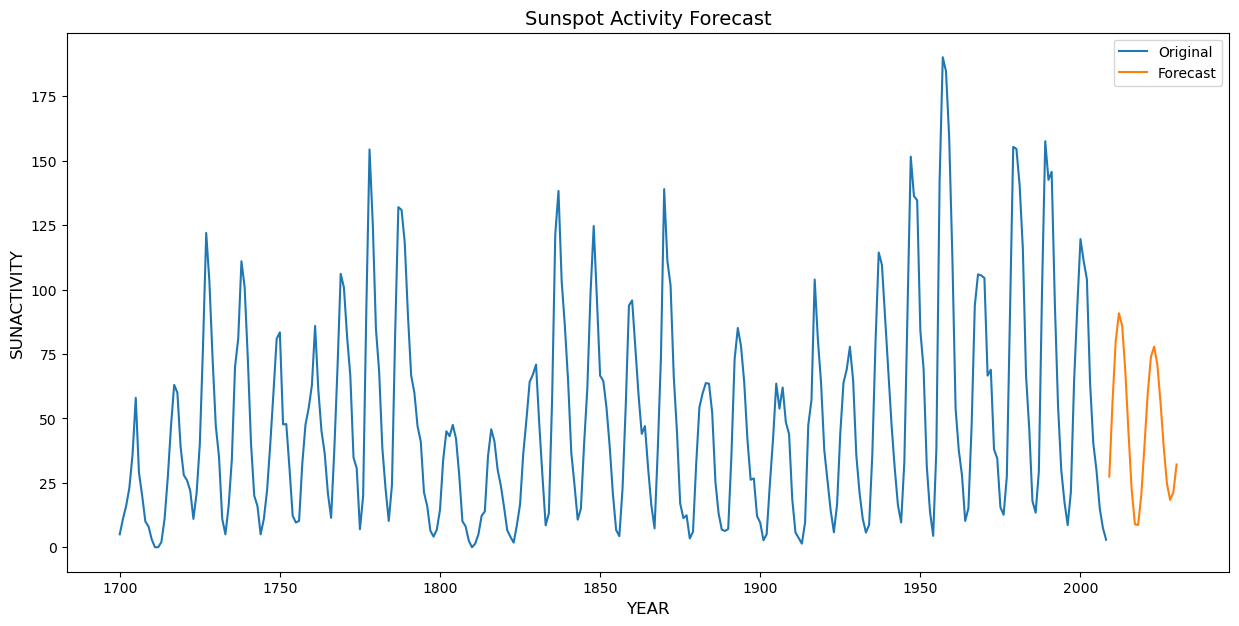

In [23]:
# Побудова графіку прогнозу
plt.figure(figsize=(15, 7))
plt.plot(data['YEAR'], data['SUNACTIVITY'], label='Original')
plt.plot(future_years, forecast, label='Forecast')
plt.xlabel('YEAR', fontsize=12)
plt.ylabel('SUNACTIVITY', fontsize=12)
plt.title('Sunspot Activity Forecast', fontsize=14)
plt.legend(loc='best')

plt.show()

In [24]:
forecast

309    27.426505
310    56.383319
311    79.989969
312    90.827969
313    86.129968
314    68.400237
315    44.266135
316    22.047135
317     8.918870
318     8.628290
319    20.475890
320    39.820667
321    59.847756
322    73.940272
323    77.839285
324    70.895973
325    56.061085
326    38.693367
327    24.651250
328    18.338663
329    21.349343
330    32.117631
Name: predicted_mean, dtype: float64